# Feature Creation

Feature creation is the process of generating new features from existing data to improve the performance of machine learning models. By creating new features, we can provide the model with additional information and insights that are not immediately apparent from the original data. This process can lead to better model accuracy and predictive power.


## Methods for Creating New Features
    
###     1. Polynomial Features

    Generating polynomial features involves creating new features by raising existing features to a power. This technique can capture nonlinear relationships between features.

###     2. Interaction Features

    Interaction features are created by multiplying two or more features together. This can help capture the combined effect of multiple features.

###     3. Aggregation

    Aggregating features involves summarizing information from multiple rows, such as computing the mean, sum, or count. This is particularly useful for time series or grouped data.

###     4. Binning

    Binning involves converting continuous features into categorical features by dividing the range into bins. This can help capture non-linear relationships and reduce the impact of outliers.


## Examples of Useful Feature Creation Techniques

### Example Data

Consider the following dataset with `Height` and `Weight` as features:

| Height (cm) | Weight (kg) |
|-------------|-------------|
| 170         | 70          |
| 160         | 60          |
| 180         | 80          |
| 175         | 75          |
| 165         | 65          |

### 1. Polynomial Features

Creating polynomial features for `Height` and `Weight`:

| Height (cm) | Weight (kg) | Height^2 | Weight^2 | Height*Weight |
|-------------|-------------|----------|----------|---------------|
| 170         | 70          | 28900    | 4900     | 11900         |
| 160         | 60          | 25600    | 3600     | 9600          |
| 180         | 80          | 32400    | 6400     | 14400         |
| 175         | 75          | 30625    | 5625     | 13125         |
| 165         | 65          | 27225    | 4225     | 10725         |

### 2. Interaction Features

Creating an interaction feature between `Height` and `Weight`:

| Height (cm) | Weight (kg) | Height*Weight |
|-------------|-------------|---------------|
| 170         | 70          | 11900         |
| 160         | 60          | 9600          |
| 180         | 80          | 14400         |
| 175         | 75          | 13125         |
| 165         | 65          | 10725         |

### 3. Aggregation

Aggregating features can include creating new features such as the mean height and weight:

| Height (cm) | Weight (kg) | Mean Height | Mean Weight |
|-------------|-------------|-------------|-------------|
| 170         | 70          | 170         | 70          |
| 160         | 60          | 170         | 70          |
| 180         | 80          | 170         | 70          |
| 175         | 75          | 170         | 70          |
| 165         | 65          | 170         | 70          |

### 4. Binning

Binning `Height` into categories:

| Height (cm) | Weight (kg) | Height Bin |
|-------------|-------------|------------|
| 170         | 70          | Medium     |
| 160         | 60          | Short      |
| 180         | 80          | Tall       |
| 175         | 75          | Medium     |
| 165         | 65          | Short      |


## Visualizations

Visualizations can show the impact of new features on model performance. For instance, by adding polynomial features, interaction features, and binned features, we can visualize their effect on the model's predictive power.

### Visualization Example

We can use histograms, scatter plots, or box plots to visualize the distribution and relationships of the new features.

- **Scatter Plot**: Shows the relationship between the original and created features.
- **Histogram**: Displays the distribution of the new features.
- **Box Plot**: Compares the impact of new features on target variable distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# Sample dataset
data = {
    'Height': [170, 160, 180, 175, 165],
    'Weight': [70, 60, 80, 75, 65]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [3]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Height', 'Weight']])
print("Original Dataset:\n",df)
poly_feature_names = poly.get_feature_names_out(['Height', 'Weight'])


df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df_poly = df_poly.drop(['Height', 'Weight'], axis=1)  # Drop original columns to avoid overlap
df = df.join(df_poly)
print("Dataset with Polynomial Features:\n",df)

Original Dataset:
    Height  Weight
0     170      70
1     160      60
2     180      80
3     175      75
4     165      65
Dataset with Polynomial Features:
    Height  Weight  Height^2  Height Weight  Weight^2
0     170      70   28900.0        11900.0    4900.0
1     160      60   25600.0         9600.0    3600.0
2     180      80   32400.0        14400.0    6400.0
3     175      75   30625.0        13125.0    5625.0
4     165      65   27225.0        10725.0    4225.0


In [4]:
# Interaction Features
df['Height_Weight'] = df['Height'] * df['Weight']
print("Dataset with Interaction Features:\n",df)

Dataset with Interaction Features:
    Height  Weight  Height^2  Height Weight  Weight^2  Height_Weight
0     170      70   28900.0        11900.0    4900.0          11900
1     160      60   25600.0         9600.0    3600.0           9600
2     180      80   32400.0        14400.0    6400.0          14400
3     175      75   30625.0        13125.0    5625.0          13125
4     165      65   27225.0        10725.0    4225.0          10725


In [5]:
# Aggregation Features
df['Mean_Height'] = df['Height'].mean()
df['Mean_Weight'] = df['Weight'].mean()

print("Dataset with Aggregation Features:\n",df)

Dataset with Aggregation Features:
    Height  Weight  Height^2  Height Weight  Weight^2  Height_Weight  \
0     170      70   28900.0        11900.0    4900.0          11900   
1     160      60   25600.0         9600.0    3600.0           9600   
2     180      80   32400.0        14400.0    6400.0          14400   
3     175      75   30625.0        13125.0    5625.0          13125   
4     165      65   27225.0        10725.0    4225.0          10725   

   Mean_Height  Mean_Weight  
0        170.0         70.0  
1        170.0         70.0  
2        170.0         70.0  
3        170.0         70.0  
4        170.0         70.0  


In [6]:
# Binning
df['Height_Bin'] = pd.cut(df['Height'], bins=[150, 165, 175, 185], labels=['Short', 'Medium', 'Tall'])
print("Dataset with Binning performed on Height:\n",df)

Dataset with Binning performed on Height:
    Height  Weight  Height^2  Height Weight  Weight^2  Height_Weight  \
0     170      70   28900.0        11900.0    4900.0          11900   
1     160      60   25600.0         9600.0    3600.0           9600   
2     180      80   32400.0        14400.0    6400.0          14400   
3     175      75   30625.0        13125.0    5625.0          13125   
4     165      65   27225.0        10725.0    4225.0          10725   

   Mean_Height  Mean_Weight Height_Bin  
0        170.0         70.0     Medium  
1        170.0         70.0      Short  
2        170.0         70.0       Tall  
3        170.0         70.0     Medium  
4        170.0         70.0      Short  


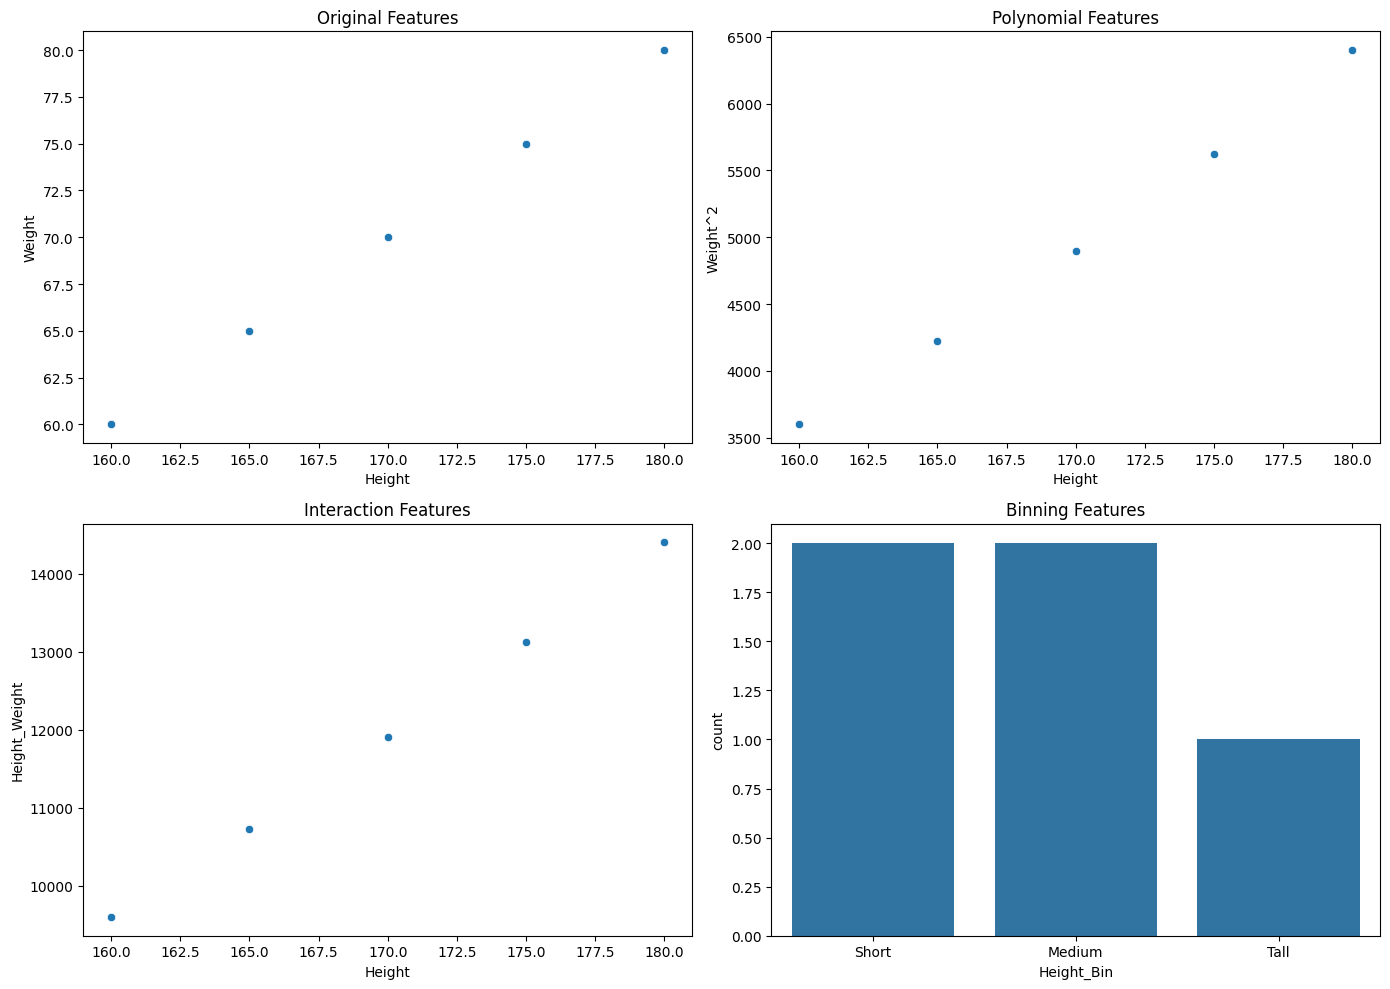

In [7]:
# Visualizations
plt.figure(figsize=(14, 10))

# Original Features
plt.subplot(2, 2, 1)
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Original Features')

# Polynomial Features
plt.subplot(2, 2, 2)
sns.scatterplot(x='Height', y='Weight^2', data=df)
plt.title('Polynomial Features')

# Interaction Features
plt.subplot(2, 2, 3)
sns.scatterplot(x='Height', y='Height_Weight', data=df)
plt.title('Interaction Features')

# Binning Features
plt.subplot(2, 2, 4)
sns.countplot(x='Height_Bin', data=df)
plt.title('Binning Features')

plt.tight_layout()
plt.show()

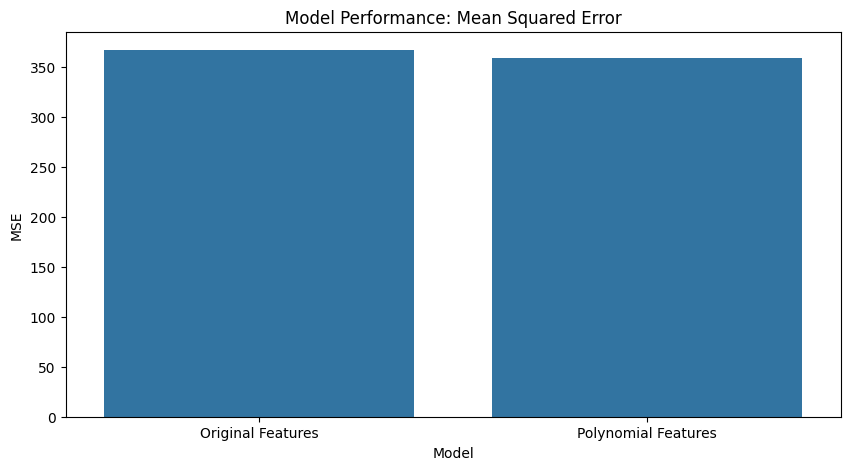

MSE with original features: 367.36111111111103
MSE with polynomial features: 359.59659901813126


In [8]:
# Model performance visualization
# Creating a simple target variable
df['Target'] = [10, 20, 30, 40, 50]

# Splitting data into train and test sets
X = df[['Height', 'Weight']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model with original features
model_original = Ridge(alpha=1.0)  # Using Ridge regression for regularization
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)
mse_original = mean_squared_error(y_test, y_pred_original)

# Model with polynomial features
poly_feature_names = [name for name in poly_feature_names if name not in ['Height', 'Weight']]
X_poly = df[poly_feature_names + ['Height_Weight']]

# Splitting and scaling polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

model_poly = Ridge(alpha=1.0)  # Using Ridge regression for regularization
model_poly.fit(X_train_poly_scaled, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly_scaled)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

# Visualize model performance
plt.figure(figsize=(10, 5))
performance = pd.DataFrame({
    'Model': ['Original Features', 'Polynomial Features'],
    'MSE': [mse_original, mse_poly]
})
sns.barplot(x='Model', y='MSE', data=performance)
plt.title('Model Performance: Mean Squared Error')
plt.show()

print(f'MSE with original features: {mse_original}')
print(f'MSE with polynomial features: {mse_poly}')

### Conclusion

In this section, we explored various methods for creating new features from existing data and assessed their impact on model performance. Specifically, we implemented polynomial feature creation, interaction features, aggregation features, and binning. The key insights are as follows:

1. **Polynomial Features**: By generating polynomial features up to the second degree, we increased the feature space, potentially capturing more complex relationships within the data. However, this can also lead to overfitting, particularly with a small dataset.

2. **Interaction Features**: Interaction features, such as the product of height and weight, can reveal interactions between variables that may be significant predictors.

3. **Aggregation Features**: Aggregation features like mean height and weight can provide a summary statistic that may improve model performance.

4. **Binning**: Binning, such as categorizing heights into 'Short', 'Medium', and 'Tall', can simplify the feature space and handle non-linearity in data.

To prevent overfitting, we applied standard scaling and used Ridge regression, a regularized linear regression model. The results showed that while polynomial features can increase the model's expressive power, they must be used with caution to avoid overfitting, especially with limited data.

In conclusion, feature creation techniques can significantly enhance a model's ability to learn and predict effectively. However, it is crucial to balance feature complexity with the risk of overfitting, using techniques like regularization and proper feature scaling.
